# PROJECT: ANTI-SPAM SOFTWARE FOR A UNIVERSITY

# 1. Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

warnings.filterwarnings('ignore')
RANDOM_SEED = 42

In [2]:
df = pd.read_csv('C:/Users/tomma/Desktop/spam_dataset.csv')

df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


"Ham" represents legitimate emails while "Spam" represents unwanted emails.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [4]:
df = df.drop("Unnamed: 0", axis=1)

In [5]:
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\nthis deal is to ...,0


# 2. Train a classifier to identify SPAM emails

In [6]:
from langdetect import detect, DetectorFactory
import langdetect.lang_detect_exception as lang_detect_exception

DetectorFactory.seed = 0

def detect_language(text):
    try:
        return detect(text)
    except (lang_detect_exception.LangDetectException, TypeError):
        return "unknown"

df['language'] = df['text'].apply(detect_language)
df = df[df['language'] == 'en'].copy()
df.drop(columns=['language'], inplace=True)

In [7]:
df.shape

(5075, 3)

Ham: 3615 (71.23%)
Spam: 1460 (28.77%)


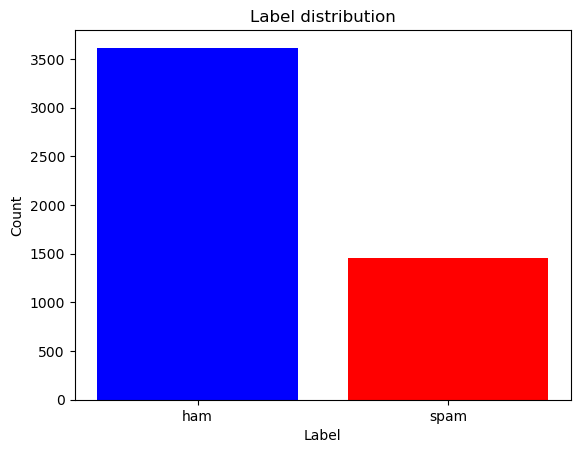

In [8]:
count = Counter(df["label"])
total = len(df["label"])

color_map = {
    "spam": "red",
    "ham": "blue"
}

for valore, counts in count.items():
    percentuale = (counts / total) * 100
    print(f"{valore.capitalize()}: {counts} ({percentuale:.2f}%)")

colori = [color_map[label] for label in count.keys()]

plt.bar(count.keys(), count.values(), color=colori)
plt.title("Label distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [9]:
df['text_length'] = df['text'].apply(len)
df.groupby('label')['text_length'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,3615.0,972.497925,1367.117464,17.0,236.50,528.0,1225.50,31860.0
spam,1460.0,1218.182192,1812.258382,10.0,289.25,571.5,1255.25,21749.0


Looking at the average, "spam" messages tend to be slightly longer than "ham".
There is a lot of variability in message length.

<Figure size 1200x600 with 0 Axes>

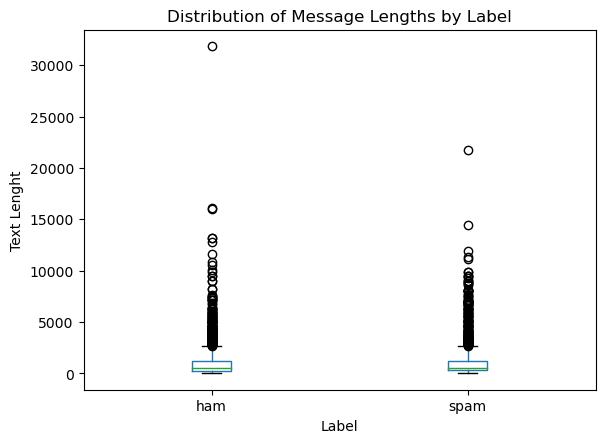

In [10]:
plt.figure(figsize=(12, 6))
df.boxplot(column='text_length', by='label', grid=False)
plt.title('Distribution of Message Lengths by Label')
plt.suptitle('')
plt.xlabel('Label')
plt.ylabel('Text Lenght')
plt.show()

From the boxplot analysis, we see that there are many outliers in both categories. The most important outlier is in the ham category with a message that exceeds 30k characters.
The distribution of message lengths is highly skewed.

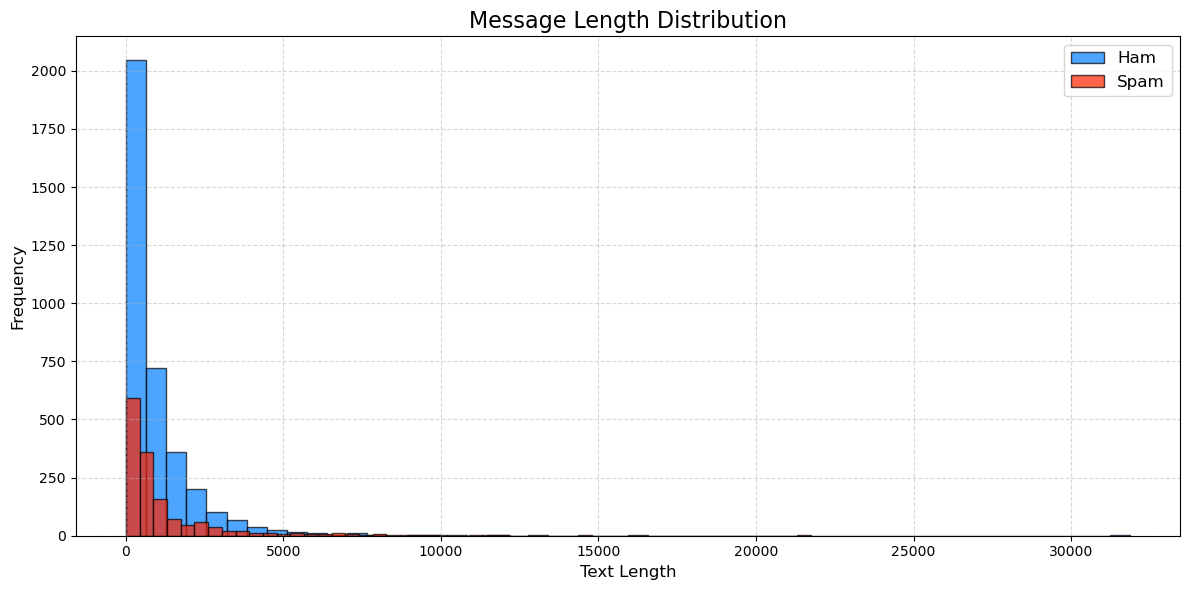

In [37]:
plt.figure(figsize=(12, 6))

ham_lengths = df[df['label'] == 'ham']['text_length']
spam_lengths = df[df['label'] == 'spam']['text_length']

# Colori più accesi
plt.hist(ham_lengths, bins=50, alpha=0.7, label='Ham', color='#007FFF', edgecolor='black')  # Electric blue
plt.hist(spam_lengths, bins=50, alpha=0.7, label='Spam', color='#FF2400', edgecolor='black')  # Scarlet red

plt.title('Message Length Distribution', fontsize=16)
plt.xlabel('Text Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

From the histogram analysis we can see that most of the messages are less than 1000 characters long with a very high frequency of ham messages compared to spam messages for the shorter lengths.

Most Common Words:
-: 85593
.: 54126
/: 42622
,: 40261
the: 25573
:: 25035
to: 20318
ect: 13900
and: 12809
@: 12726
for: 10451
of: 10146
a: 9785
you: 8152
in: 7674
': 7502
on: 7298
hou: 7289
is: 7154
this: 7153


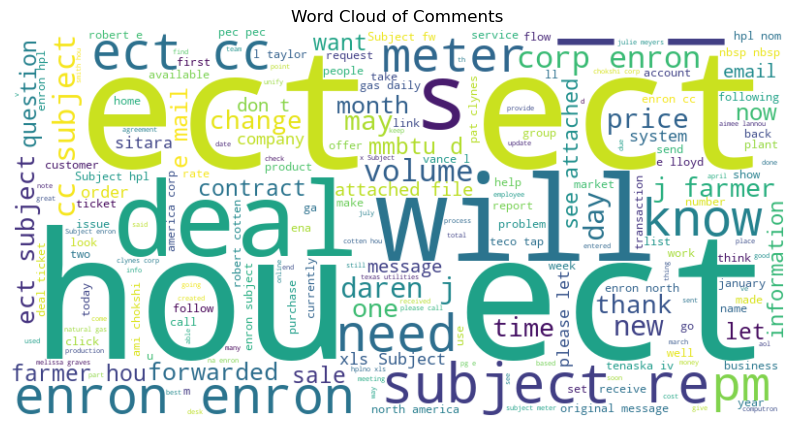

In [12]:
from wordcloud import WordCloud

all_text = ' '.join(df["text"])

word_counts = Counter(all_text.split())

most_common_words = word_counts.most_common(20)
print("Most Common Words:")
for word, count in most_common_words:
    print(f'{word}: {count}')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()

In [13]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 162.5 kB/s eta 0:01:19
     --------------------------------------- 0.0/12.8 MB 163.8 kB/s eta 0:01:18
     --------------------------------------- 0.0/12.8 MB 163.8 kB/s eta 0:01:18
     --------------------------------------- 0.0/12.8 MB 163.4 kB/s eta 0:01:19
     --------------------------------------- 0.1/12.8 MB 182.2 kB/s eta 0:01:10
     --------------------------------------- 0.1/12.8 MB 229.0 kB/s eta 0:00:56
     --------------------------------------- 0.1/12.8 MB 284.4 kB/s eta 0:00:45
      -------------------------------------- 0.2/12.8 MB 403.5 kB/s eta 0:00:32
     - ------------------------------------- 0.3/12.8 MB 698.7 kB/s eta 0:00:18
     - -------------------------------------- 0.6/12.8 MB 1.1 MB

In [14]:
import spacy
import string
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

import re


from sklearn.feature_extraction.text import TfidfVectorizer
english_stopwords = set(stopwords.words("english") + ['subject', 'etc', 'ect', 'cc', 'hou'])
punctuation = set(string.punctuation)
nlp = spacy.load("en_core_web_sm")
punct_re = re.compile(f'[{re.escape(string.punctuation)}]')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
def data_cleaner(sentence):
    sentence = sentence.lower()
    sentence = punct_re.sub(" ", sentence)
    doc = nlp(sentence)
    return ' '.join(token.lemma_ for token in doc if token.text not in english_stopwords and not token.is_digit)

In [16]:
X = df["text"].apply(data_cleaner)
y = df["label"]

Most Common Words:
enron: 6426
com: 3697
deal: 3653
please: 3196
gas: 3025
meter: 2719
pm: 2340
thank: 2294
hpl: 2192
need: 2078
e: 1964
daren: 1901
forward: 1825
corp: 1776
get: 1703
know: 1694
volume: 1684
price: 1624
day: 1547
new: 1447


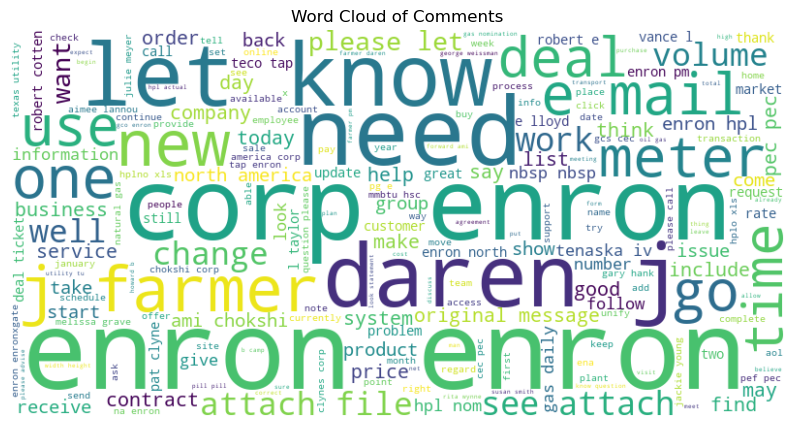

In [17]:
all_text = ' '.join(X)

word_counts = Counter(all_text.split())

most_common_words = word_counts.most_common(20)
print("Most Common Words:")
for word, count in most_common_words:
    print(f'{word}: {count}')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.7)
X_transformed = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [19]:
lr = LogisticRegression(random_state=RANDOM_SEED)
lr_scores = cross_val_score(lr, X_train, y_train, cv=5) 
print(f"Logistic Regression CV Scores: {lr_scores.mean():.4f} (+/- {lr_scores.std() * 2:.4f})") 
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Logistic Regression Test Report:")
print(classification_report(y_test, y_pred))

Logistic Regression CV Scores: 0.9823 (+/- 0.0067)
Logistic Regression Test Report:
              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       723
        spam       0.96      0.99      0.98       292

    accuracy                           0.99      1015
   macro avg       0.98      0.99      0.98      1015
weighted avg       0.99      0.99      0.99      1015



In [20]:
mlp = MLPClassifier(random_state=RANDOM_SEED, max_iter=300)
mlp_scores = cross_val_score(mlp, X_train, y_train, cv=5) 
print(f"MLP Classifier CV Scores: {mlp_scores.mean():.4f} (+/- {mlp_scores.std() * 2:.4f})") 

mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print("MLP Classifier Test Report:")
print(classification_report(y_test, y_pred))

MLP Classifier CV Scores: 0.9850 (+/- 0.0048)
MLP Classifier Test Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       723
        spam       0.97      0.98      0.97       292

    accuracy                           0.99      1015
   macro avg       0.98      0.98      0.98      1015
weighted avg       0.99      0.99      0.99      1015



# 3. Identify Top Topics Among Emails Classified as SPAM

In [21]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
spam_text = df[df['label'] == 'spam']['text'].apply(data_cleaner)

In [23]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(spam_text)

In [24]:
lda = LatentDirichletAllocation(n_components=5, random_state=RANDOM_SEED)
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [25]:
def print_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        print(f"Topic {topic_idx}: {', '.join(top_features)}")

In [26]:
print_topics(lda, cv.get_feature_names_out(), 10)

Topic 0: company, statement, stock, information, investment, security, report, price, make, look
Topic 1: font, http, td, nbsp, height, com, width, size, align, www
Topic 2: say, palestinian, belize, source, st, shell, israeli, military, ur, attack
Topic 3: http, pill, price, com, good, save, viagra, online, new, need
Topic 4: com, computron, www, remove, contact, message, free, email, mail, list


# 4. Calculating Semantic Distance

In [27]:
normalized_topics = []
for topic in lda.components_:
    normalized_topic = topic / np.sum(topic)
    normalized_topics.append(normalized_topic)
    
normalized_topics = np.array(normalized_topics)

In [38]:
for i, topic in enumerate(normalized_topics):
    print(f"Topic {i}:")
    print(f" Sum: {np.sum(topic):.6f}")
    print(f" Min: {np.min(topic):.6f}")
    print(f" Max: {np.max(topic):.6f}")
    print(f" Negative Values: {np.any(topic < 0)}")
    print()

Topic 0:
 Sum: 1.000000
 Min: 0.000004
 Max: 0.018896
 Negative Values: False

Topic 1:
 Sum: 1.000000
 Min: 0.000007
 Max: 0.017549
 Negative Values: False

Topic 2:
 Sum: 1.000000
 Min: 0.000011
 Max: 0.004601
 Negative Values: False

Topic 3:
 Sum: 1.000000
 Min: 0.000006
 Max: 0.012005
 Negative Values: False

Topic 4:
 Sum: 1.000000
 Min: 0.000009
 Max: 0.015407
 Negative Values: False



In [29]:
from scipy.spatial.distance import jensenshannon

def topic_distances(normalized_topics):
    n_topics = len(normalized_topics)
    distances = np.zeros((n_topics, n_topics))

    for i in range(n_topics):
        for j in range(i+1, n_topics):
            distance = jensenshannon(normalized_topics[i], normalized_topics[j])
            distances[i, j] = distance
            distances[j, i] = distance
            
    return distances

distances = topic_distances(normalized_topics)

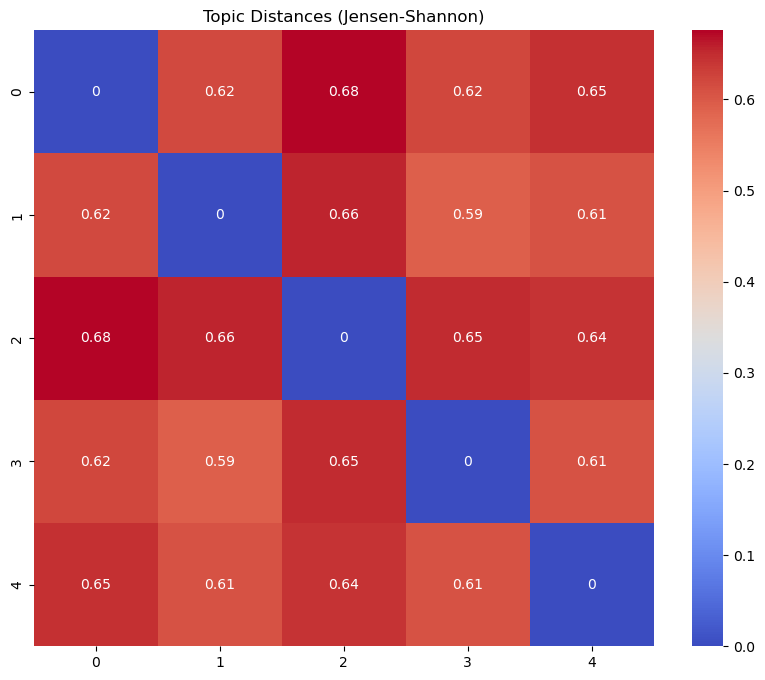

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(distances, annot=True, cmap='coolwarm')
plt.title('Topic Distances (Jensen-Shannon)')
plt.show()

The Jensen-Shannon distance measures the similarity between probability distributions.

# 5. NON-SPAM Email Extraction

In [31]:
def extract_organizations(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == 'ORG']

In [32]:
ham_texts = df[df['label'] == 'ham']['text']
organizations = ham_texts.apply(extract_organizations)

In [33]:
all_orgs = [org for orgs in organizations for org in orgs]
org_counts = Counter(all_orgs)

In [34]:
print("Top 10 Organizations in Non-Spam Emails:")
for org, count in org_counts.most_common(10):
    print(f"{org}: {count}")

Top 10 Organizations in Non-Spam Emails:
: 271
doc: 174
north america corp .: 166
ami chokshi / corp / enron: 153
xls: 123
enron north america corp .: 81
pg & e: 71
riley / hou /: 57
mary m smith / hou /: 53
exxon: 52
